## <center><img src="https://www-league.nhlstatic.com/images/logos/league-dark/133-flat.svg" alt="" width="150"/> players birth month bias</center>
#### <center>Stanislav Maryenko</center><center>January 2022</center>

 - **Description:** Once a while I have read an [article](https://www.nhl.com/news/study-suggests-nhl-has-bias-in-favour-of-players-born-earlier-in-the-year/c-657724) that NHL has bias in favour of players born earlier in the year, so I want to check if this is still true nowadays. 
 - **Goal:** Check if the study from the article is actually true for current NHL players (season 21-22), does it depend on the country where player was born
 - **Additional goal:** Check if there are any players in NHL from southern hemisphere of the Earth
 - **Dataset:** I was not able to find a data which contains dates of birth of all players, so I had to collect it myself using [NHL STATS API WEBSITE](https://statsapi.web.nhl.com/api/v1/)

### DATA

CSV file is going to be available together with thi notebook

In [ ]:
# Path to the data containing file
data_path= '/Users/smaryenko/Downloads/nhl_players_jan_2022.csv'

If you want to collect data by yourself, you can run code snippet under the spoiler below  
**NOTE:** code does around 1000 of API calls in order to get data for all NHL players, so use it responsibly

<details>
<summary><b>Code to get palyers data</b></summary>

```python
import requests  
  
rows_list = []  
df = pd.DataFrame(None)  
  
# NHL Api url  
url = 'https://statsapi.web.nhl.com/api/v1/'  
  
# Get list of all teams  
resp = requests.get(url=url + 'teams')  
teams_data=resp.json()  
  
# Loop through teams to get their roster  
for team in teams_data['teams']:  
      
    # Get team roster   
    resp = requests.get(url=url + 'teams/' + str(team['id']) + '/roster')  
    roster_data = resp.json()  
      
    # Loop through team roster to get player details  
    for person in roster_data['roster']:  
          
        # Get player details  
        resp = requests.get(url=url + 'people/' + str(person['person']['id']))  
        player_data = resp.json()  
        player = player_data['people'][0]  
          
        # Save player details into dictionary  
        dict1 = {'Id' : player['id'],   
         'Name' : player['fullName'],   
         'Birthday' : player['birthDate'],   
         'Birth Country' : player['birthCountry'],   
         'Team Id' : team['id'],   
         'Team Name' : team['name']}  
          
        # Append dictionary to the list of all players  
        rows_list.append(dict1)  
          
# Create dataframe from players list  
df = pd.DataFrame(rows_list)   
  
# Save dataframe to csv file  
df.to_csv(data_path, index=False)  
```

</details>

In [191]:
# Read data from CSV file
df = pd.read_csv(data_path, on_bad_lines='skip')

### Data manipulation

In [225]:
# Add column with birth month of each player
df['Birth Month'] = pd.DatetimeIndex(df['Birthday']).month

In [198]:
# Create a new dataframe with USA and Canada players only
df_usa_can = df[df['Birth Country'].isin(['CAN', 'USA'])]

In [231]:
# Prepare dataframe to plot data
df_plot = pd.concat([df.groupby('Birth Month').size(), df_usa_can.groupby('Birth Month').size()], axis=1, ignore_index=False)

df_plot.reset_index(level=0, inplace=True)
df_plot.columns = ['Birth Month', 'All Players', 'USA and CAN players']

df_plot['All Players %'] = (df_plot['All Players'] / df_plot['All Players'].sum()) * 100
df_plot['USA and CAN players %'] = (df_plot['USA and CAN players'] / df_plot['USA and CAN players'].sum()) * 100

### Data analysis

<AxesSubplot:xlabel='Birth Month'>

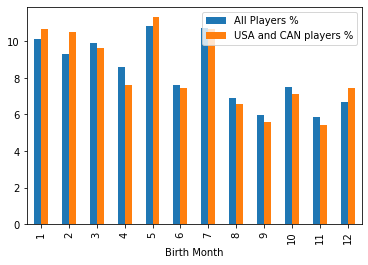

In [233]:
# Plotting data
df_plot.plot(x='Birth Month', y=['All Players %', 'USA and CAN players %'], kind="bar")

**Key observations:**
 - Surprisingly high amount of players born in May and July
 - Weird drop in June
 - Players born between August and December are indeed underrepresented

Lets also look on the general birth distribution in USA and Canada for 2020 to check if it has uniform distribution  
Data was taken from
 - [National Center for Health Statistics](https://www.cdc.gov/nchs/nvss/vsrr/provisional-tables.htm) for USA
 - [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310041501) for Canada

In [239]:
## Read data from Excel file
data_births_path= '/Users/smaryenko/Downloads/USA_CAN_births_2020.xlsx'
df_births = pd.read_excel(data_births_path)

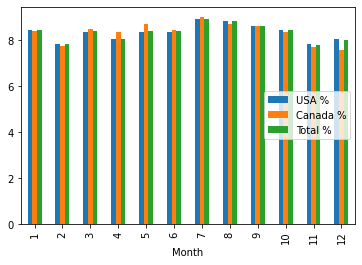

In [240]:
## Plot data
df_births.plot(x='Month', y=['USA %', 'Canada %', 'Total %'], kind="bar").legend(loc='right')

**Key observations:**
 - Births are almost evenly distrributed between the months
 - Tiny peak in July

**Looking into players countries of birth:**

In [238]:
df.groupby(['Birth Country']).size().sort_values(ascending=False)

Birth Country
CAN    358
USA    233
SWE     83
FIN     47
RUS     42
CZE     29
CHE     11
SVK      8
DEU      6
DNK      5
LVA      4
AUT      3
FRA      3
SVN      1
GBR      1
NOR      1
NLD      1
BGR      1
BLR      1
UZB      1
dtype: int64

**Key observations:**
 - No players born in Southern hemisphere

### Conclusions

Players born between August and December are indeed underrepresented in NHL, however this is also true for players born in June. Number of players born in May and July are the highest among others, which also correlates with general bith rates in those months in USA and Canada (July is the 'babiest' month). There are no players in NHL which were born in Southern hemisphere of the Earth.